## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  28.750556  1711.912930  0.258585  10.432255   443.552767
1  72.529120  1136.441172  0.436421   6.210951   501.364988
2  35.758242   440.318533  0.597528   2.352067   265.588026
3  65.057423  1662.283217  0.809308   1.952242  1346.865389
4  87.371535   846.854224  0.397987   5.312600   348.283050


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9215016	total: 65.7ms	remaining: 1m 5s
1:	learn: 0.9122571	total: 66.3ms	remaining: 33.1s
2:	learn: 0.9015677	total: 66.8ms	remaining: 22.2s
3:	learn: 0.8906709	total: 67.4ms	remaining: 16.8s
4:	learn: 0.8814437	total: 67.8ms	remaining: 13.5s
5:	learn: 0.8707929	total: 68.3ms	remaining: 11.3s
6:	learn: 0.8576693	total: 68.9ms	remaining: 9.78s
7:	learn: 0.8446988	total: 69.5ms	remaining: 8.61s
8:	learn: 0.8336386	total: 70ms	remaining: 7.71s
9:	learn: 0.8203118	total: 70.6ms	remaining: 6.99s
10:	learn: 0.8097211	total: 71ms	remaining: 6.38s
11:	learn: 0.7966554	total: 71.6ms	remaining: 5.89s
12:	learn: 0.7856059	total: 72.2ms	remaining: 5.48s
13:	learn: 0.7757993	total: 72.7ms	remaining: 5.12s
14:	learn: 0.7666037	total: 73.3ms	remaining: 4.81s
15:	learn: 0.7576780	total: 73.8ms	remaining: 4.54s
16:	learn: 0.7462334	total: 74.2ms	remaining: 4.29s
17:	learn: 0.7385186	total: 74.7ms	remaining: 4.08s
18:	learn: 0.7310392	total: 75.1ms	remaining: 3.

90:	learn: 0.3026311	total: 108ms	remaining: 1.07s
91:	learn: 0.2997579	total: 108ms	remaining: 1.07s
92:	learn: 0.2969085	total: 108ms	remaining: 1.06s
93:	learn: 0.2934069	total: 109ms	remaining: 1.05s
94:	learn: 0.2899315	total: 109ms	remaining: 1.04s
95:	learn: 0.2863910	total: 110ms	remaining: 1.03s
96:	learn: 0.2832777	total: 110ms	remaining: 1.02s
97:	learn: 0.2800305	total: 111ms	remaining: 1.02s
98:	learn: 0.2774592	total: 111ms	remaining: 1.01s
99:	learn: 0.2738770	total: 111ms	remaining: 1s
100:	learn: 0.2702133	total: 112ms	remaining: 993ms
101:	learn: 0.2673394	total: 112ms	remaining: 987ms
102:	learn: 0.2648977	total: 113ms	remaining: 980ms
103:	learn: 0.2622536	total: 113ms	remaining: 973ms
104:	learn: 0.2597150	total: 113ms	remaining: 967ms
105:	learn: 0.2563868	total: 114ms	remaining: 960ms
106:	learn: 0.2538100	total: 114ms	remaining: 954ms
107:	learn: 0.2513684	total: 115ms	remaining: 947ms
108:	learn: 0.2483593	total: 115ms	remaining: 942ms
109:	learn: 0.2460073	tot

275:	learn: 0.0694765	total: 186ms	remaining: 488ms
276:	learn: 0.0690548	total: 187ms	remaining: 487ms
277:	learn: 0.0687104	total: 188ms	remaining: 488ms
278:	learn: 0.0682632	total: 188ms	remaining: 486ms
279:	learn: 0.0678945	total: 189ms	remaining: 485ms
280:	learn: 0.0674283	total: 189ms	remaining: 484ms
281:	learn: 0.0670229	total: 190ms	remaining: 483ms
282:	learn: 0.0667142	total: 190ms	remaining: 482ms
283:	learn: 0.0664447	total: 191ms	remaining: 481ms
284:	learn: 0.0661407	total: 191ms	remaining: 479ms
285:	learn: 0.0657213	total: 191ms	remaining: 478ms
286:	learn: 0.0654163	total: 192ms	remaining: 477ms
287:	learn: 0.0649731	total: 192ms	remaining: 476ms
288:	learn: 0.0645524	total: 193ms	remaining: 474ms
289:	learn: 0.0641939	total: 193ms	remaining: 473ms
290:	learn: 0.0639293	total: 194ms	remaining: 472ms
291:	learn: 0.0635385	total: 194ms	remaining: 470ms
292:	learn: 0.0632455	total: 195ms	remaining: 470ms
293:	learn: 0.0628419	total: 195ms	remaining: 468ms
294:	learn: 

514:	learn: 0.0241305	total: 289ms	remaining: 273ms
515:	learn: 0.0240239	total: 290ms	remaining: 272ms
516:	learn: 0.0239778	total: 290ms	remaining: 271ms
517:	learn: 0.0238758	total: 291ms	remaining: 270ms
518:	learn: 0.0238105	total: 291ms	remaining: 270ms
519:	learn: 0.0236838	total: 291ms	remaining: 269ms
520:	learn: 0.0235844	total: 292ms	remaining: 268ms
521:	learn: 0.0235366	total: 292ms	remaining: 268ms
522:	learn: 0.0234161	total: 293ms	remaining: 267ms
523:	learn: 0.0233693	total: 293ms	remaining: 266ms
524:	learn: 0.0232394	total: 294ms	remaining: 266ms
525:	learn: 0.0231396	total: 294ms	remaining: 265ms
526:	learn: 0.0230932	total: 294ms	remaining: 264ms
527:	learn: 0.0229973	total: 295ms	remaining: 263ms
528:	learn: 0.0229365	total: 295ms	remaining: 263ms
529:	learn: 0.0228167	total: 295ms	remaining: 262ms
530:	learn: 0.0227713	total: 296ms	remaining: 261ms
531:	learn: 0.0226783	total: 296ms	remaining: 261ms
532:	learn: 0.0226147	total: 297ms	remaining: 260ms
533:	learn: 

700:	learn: 0.0125995	total: 368ms	remaining: 157ms
701:	learn: 0.0125743	total: 369ms	remaining: 157ms
702:	learn: 0.0125207	total: 369ms	remaining: 156ms
703:	learn: 0.0125076	total: 369ms	remaining: 155ms
704:	learn: 0.0124663	total: 370ms	remaining: 155ms
705:	learn: 0.0124482	total: 370ms	remaining: 154ms
706:	learn: 0.0124242	total: 371ms	remaining: 154ms
707:	learn: 0.0124100	total: 371ms	remaining: 153ms
708:	learn: 0.0123538	total: 372ms	remaining: 153ms
709:	learn: 0.0122985	total: 372ms	remaining: 152ms
710:	learn: 0.0122590	total: 373ms	remaining: 152ms
711:	learn: 0.0122438	total: 373ms	remaining: 151ms
712:	learn: 0.0122208	total: 374ms	remaining: 150ms
713:	learn: 0.0121806	total: 374ms	remaining: 150ms
714:	learn: 0.0121270	total: 375ms	remaining: 149ms
715:	learn: 0.0120744	total: 375ms	remaining: 149ms
716:	learn: 0.0119883	total: 376ms	remaining: 148ms
717:	learn: 0.0119390	total: 376ms	remaining: 148ms
718:	learn: 0.0118890	total: 377ms	remaining: 147ms
719:	learn: 

932:	learn: 0.0060718	total: 471ms	remaining: 33.9ms
933:	learn: 0.0060670	total: 472ms	remaining: 33.3ms
934:	learn: 0.0060557	total: 472ms	remaining: 32.8ms
935:	learn: 0.0060490	total: 473ms	remaining: 32.3ms
936:	learn: 0.0060328	total: 473ms	remaining: 31.8ms
937:	learn: 0.0060210	total: 474ms	remaining: 31.3ms
938:	learn: 0.0060099	total: 474ms	remaining: 30.8ms
939:	learn: 0.0059981	total: 475ms	remaining: 30.3ms
940:	learn: 0.0059916	total: 475ms	remaining: 29.8ms
941:	learn: 0.0059801	total: 475ms	remaining: 29.3ms
942:	learn: 0.0059583	total: 476ms	remaining: 28.8ms
943:	learn: 0.0059446	total: 476ms	remaining: 28.3ms
944:	learn: 0.0059381	total: 477ms	remaining: 27.8ms
945:	learn: 0.0059270	total: 477ms	remaining: 27.3ms
946:	learn: 0.0059138	total: 478ms	remaining: 26.7ms
947:	learn: 0.0059028	total: 478ms	remaining: 26.2ms
948:	learn: 0.0058896	total: 479ms	remaining: 25.7ms
949:	learn: 0.0058832	total: 479ms	remaining: 25.2ms
950:	learn: 0.0058703	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

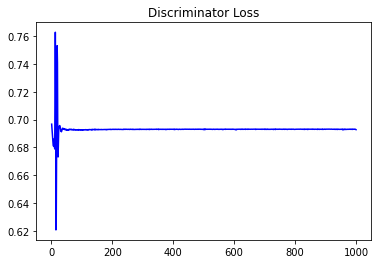

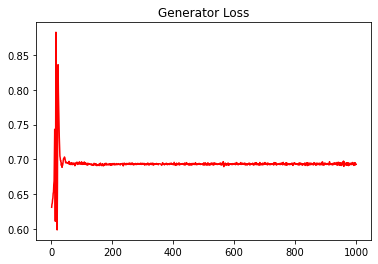

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0036127354560566978


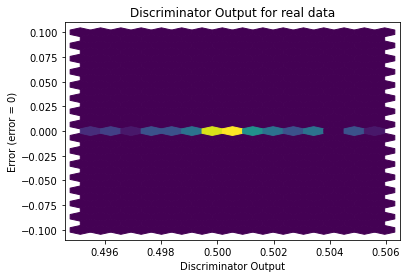

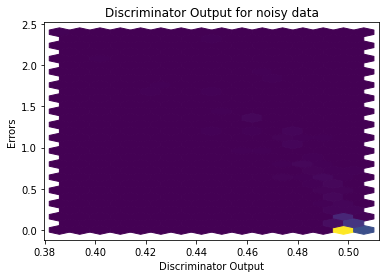

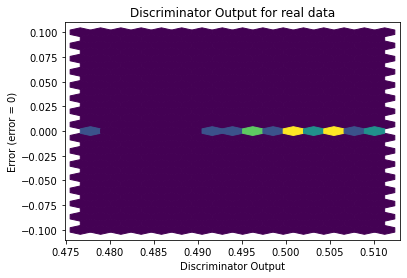

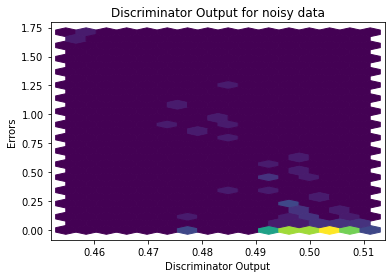

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


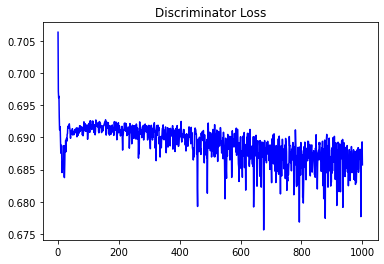

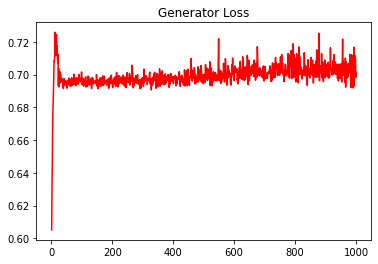

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007663244567220238


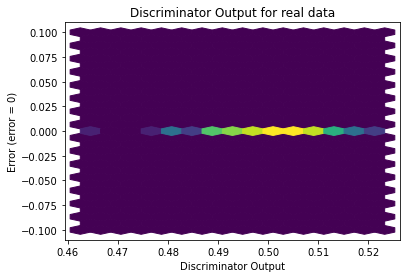

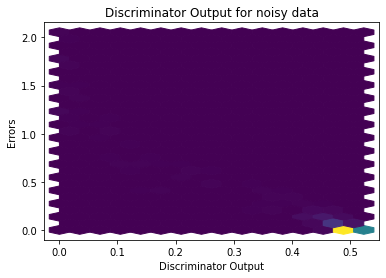

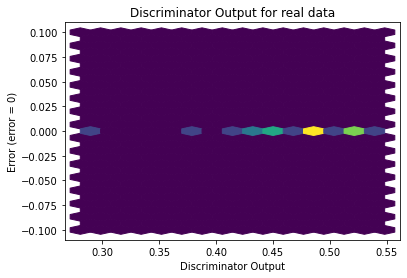

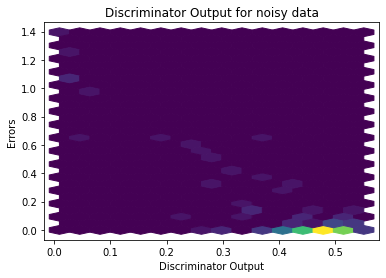

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1008]], requires_grad=True)
